In [49]:
import minisom
import pandas as pd
import sklearn
import matplotlib

In [50]:
pd.__version__, sklearn.__version__, matplotlib.__version__

('2.1.4', '1.4.2', '3.7.5')

In [51]:
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pylab import pcolor, colorbar, plot

In [52]:
base = pd.read_csv('wines.csv')
base

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [53]:
X = base.iloc[:, 1:14].values
y = base.iloc[:, 0].values

In [54]:
normalizador = MinMaxScaler(feature_range=(0, 1))
X = normalizador.fit_transform(X)

In [55]:
som = MiniSom(x=8, y=8, input_len=13, sigma=1.0, learning_rate=0.5, random_seed=2)

In [56]:
som.random_weights_init(X)

In [57]:
som.train_random(data=X, num_iteration=100)

In [58]:
som._weights

array([[[0.41619617, 0.39449386, 0.50685798, 0.4422608 , 0.28651455,
         0.62779354, 0.50350414, 0.5263484 , 0.54477405, 0.19242564,
         0.67435595, 0.63823686, 0.28429463],
        [0.72914786, 0.57451979, 0.52076754, 0.31312334, 0.38252807,
         0.62951827, 0.53988429, 0.23959452, 0.4316248 , 0.29844888,
         0.37657397, 0.72298876, 0.47053241],
        [0.53371796, 0.32082308, 0.51228125, 0.37102385, 0.25630737,
         0.44474728, 0.24429873, 0.66662266, 0.3169272 , 0.33613626,
         0.26874899, 0.34012126, 0.33540481],
        [0.28051343, 0.34827867, 0.83688038, 0.7920189 , 0.41270368,
         0.60188459, 0.75799137, 0.68549201, 0.42792331, 0.3603494 ,
         0.35878113, 0.70381793, 0.17784128],
        [0.58224813, 0.24425604, 0.54544019, 0.43512895, 0.31209432,
         0.43000405, 0.42551836, 0.58164702, 0.43839386, 0.20401329,
         0.59252411, 0.53116227, 0.40113876],
        [0.2678605 , 0.33046249, 0.48202195, 0.54613877, 0.20415451,
         0.

In [59]:
som._activation_map

array([[1.01875531, 1.10132912, 1.19866488, 1.40142351, 1.00705757,
        1.00729422, 1.02790339, 1.3191834 ],
       [1.27769625, 1.06089328, 1.09905025, 1.38558857, 1.17897137,
        1.09506616, 1.13952606, 1.07530871],
       [1.03590066, 1.09911785, 1.06776071, 1.12662746, 0.94804238,
        1.03776935, 1.07421396, 1.15995304],
       [0.95989401, 1.08160766, 1.08224608, 1.11256251, 1.1814428 ,
        1.3585863 , 0.96833328, 0.96678035],
       [1.19789377, 1.08917309, 1.04282663, 0.96058684, 1.26527795,
        1.20642795, 0.97870479, 1.00570549],
       [0.81107365, 0.86585837, 0.88651701, 0.84704386, 1.43930838,
        1.35380316, 1.0214357 , 1.157416  ],
       [1.3460159 , 0.84860074, 0.79616552, 1.00829361, 1.23153114,
        0.96697443, 0.86562016, 0.95414742],
       [0.9546346 , 0.91339806, 1.21402751, 1.07032451, 1.18476395,
        1.22011074, 0.9766536 , 0.84369113]])

In [60]:
q = som.activation_response(X)

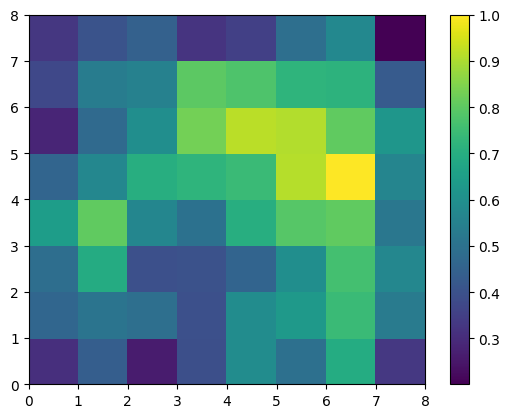

In [61]:
pcolor(som.distance_map().T)
colorbar()

In [62]:
w = som.winner(X[2])

In [63]:
markers = ['o', 's', 'D']
color = ['r', 'g', 'b']

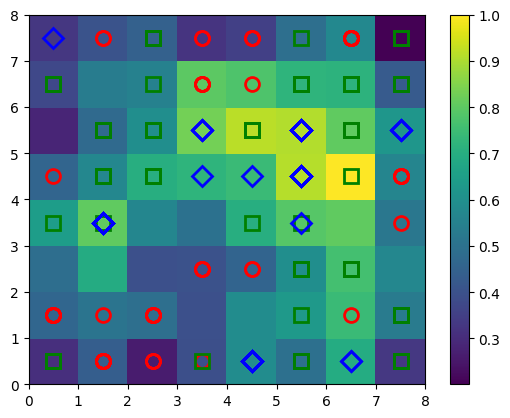

In [64]:
pcolor(som.distance_map().T)
colorbar()

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]-1], # como y contém valores 1, 2, e 3, precisamos substrair 1 para corresponder aos índices 0, 1 e 2
         markerfacecolor='None', markersize=10,
         markeredgecolor=color[y[i]-1], markeredgewidth=2)